In [1]:
#Adding dependecies 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from chart_studio import plotly
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.tools import FigureFactory as ff
import matplotlib.pyplot as plt
from PIL import Image
import os
import warnings
warnings.filterwarnings("ignore")
# Any results you write to the current directory are saved as output.
#Change

In [2]:
#Opening file and assigning variable. 
total_sales = pd.read_csv("Resources\Video_Games_Sales_as_at_22_Dec_2016.csv")

In [3]:
#finding the column for each genre and assogning variable 
simulation=total_sales[total_sales.Genre=="Simulation"]
fight=total_sales[total_sales.Genre=="Fighting"]
strategy=total_sales[total_sales.Genre=="Strategy"]
puzzle=total_sales[total_sales.Genre=="Puzzle"]
misc=total_sales[total_sales.Genre=="Misc"]
role=total_sales[total_sales.Genre=="Role-Playing"]
shooter=total_sales[total_sales.Genre=="Shooter"]
adventure=total_sales[total_sales.Genre=="Adventure"]
race=total_sales[total_sales.Genre=="Racing"]
action=total_sales[total_sales.Genre=="Action"]
sports=total_sales[total_sales.Genre=="Sports"]
platform=total_sales[total_sales.Genre=="Platform"]

In [4]:
#Settting up the bars for the visualization and making graph look pretty  
bar1 = go.Bar(
    x=action.groupby("Platform")["Global_Sales"].sum().index,
    y=action.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Action",
    marker=dict(color="rgb(119,172,238)"))
bar2 = go.Bar(
    x=sports.groupby("Platform")["Global_Sales"].sum().index,
    y=sports.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Sports",
    marker=dict(color='rgb(21,90,174)'))
bar3 = go.Bar(
    x=race.groupby("Platform")["Global_Sales"].sum().index,
    y=race.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Racing",
    marker=dict(color="rgb(156,245,163)"))
bar4 = go.Bar(
    x=shooter.groupby("Platform")["Global_Sales"].sum().index,
    y=shooter.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Shooter",
    marker=dict(color="rgb(14,135,23)"))
bar5 = go.Bar(
    x=misc.groupby("Platform")["Global_Sales"].sum().index,
    y=misc.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Misc",
    marker=dict(color='rgb(252,118,103)'))
bar6 = go.Bar(
    x=role.groupby("Platform")["Global_Sales"].sum().index,
    y=role.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Role Playing",
    marker=dict(color="rgb(226,28,5)"))
bar7 = go.Bar(
    x=fight.groupby("Platform")["Global_Sales"].sum().index,
    y=fight.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Fighting",
    marker=dict(color="rgb(247,173,13)"))
bar8 = go.Bar(
    x=platform.groupby("Platform")["Global_Sales"].sum().index,
    y=platform.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Platform",
    marker=dict(color="rgb(242,122,13)"))
bar9 = go.Bar(
    x=simulation.groupby("Platform")["Global_Sales"].sum().index,
    y=simulation.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Simulation",
    marker=dict(color="rgb(188,145,202)"))
bar10 = go.Bar(
    x=adventure.groupby("Platform")["Global_Sales"].sum().index,
    y=adventure.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Adventure",
    marker=dict(color='rgb(104,57,119)'))
bar11 = go.Bar(
    x=strategy.groupby("Platform")["Global_Sales"].sum().index,
    y=strategy.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Strategy",
    marker=dict(color='rgb(245,253,104)'))
bar12 = go.Bar(
    x=puzzle.groupby("Platform")["Global_Sales"].sum().index,
    y=puzzle.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Puzzle",
    marker=dict(color='rgb(138,72,40)'))

data = [bar1, bar2,bar3,bar4,bar5,bar6,bar7,bar8,bar9,bar10,bar11,bar12]
layout = go.Layout(barmode='stack',
                   title='Total Global Sales According to Platform and Genre',
                   xaxis=dict(title='Platform'),
                   yaxis=dict( title='Global Sales(In Millions)'),
                   paper_bgcolor='white',
                   plot_bgcolor='white'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [5]:
#Grouping Genre based on the total sales of erach region and adding a counts column to original variable assignment
genre=pd.DataFrame(total_sales.groupby("Genre")[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]].sum())
genre.reset_index(level=0, inplace=True)
genrecount=pd.DataFrame(total_sales["Genre"].value_counts())
genrecount.reset_index(level=0, inplace=True)
genrecount.rename(columns={"Genre": "Counts","index":"Genre"}, inplace=True)

genre=pd.merge(genre,genrecount,on="Genre")

In [6]:
#displaying Genre and Total Sales by Region 
genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Counts
0,Action,879.01,519.13,161.44,184.60,1745.27,3370
1,Adventure,105.26,63.54,52.30,16.49,237.69,1303
2,Fighting,223.36,100.33,87.48,36.36,447.48,849
3,Misc,407.27,212.74,108.11,74.39,803.18,1750
4,Platform,445.50,200.35,130.83,51.09,828.08,888
5,Puzzle,122.87,50.01,57.31,12.38,243.02,580
6,Racing,359.35,236.51,56.71,76.10,728.90,1249
7,Role-Playing,330.81,188.71,355.46,59.63,934.40,1500
8,Shooter,592.24,317.34,38.76,104.11,1052.94,1323
9,Simulation,182.19,113.52,63.80,30.75,390.42,874


In [7]:
# Setting up the data tables that will be used for second visualization #
column_table=genre[["Genre","NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]]
column_table = column_table.rename(columns = {"NA_Sales": "North America", 
                                  "EU_Sales":"Europe", 
                                  "JP_Sales": "Japan","Other_Sales":"Other","Global_Sales":"Total"})

In [8]:
x=genre.Genre
NA_Perce=list(genre["NA_Sales"]/genre["Global_Sales"]*100)
EU_Perce=list(genre["EU_Sales"]/genre["Global_Sales"]*100)
JP_Perce=list(genre["JP_Sales"]/genre["Global_Sales"]*100)
Other_Perce=list(genre["Other_Sales"]/genre["Global_Sales"]*100)

bar1 = go.Bar(
    x=x,
    y=NA_Perce,
    name="North America" ,
    xaxis='x2', yaxis='y2',
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=3),
        ),
    opacity=0.75)
bar2 = go.Bar(
    x=x,
    y=EU_Perce,
    xaxis='x2', yaxis='y2',
    marker=dict(
        color='red',
        line=dict(
            color='rgb(8,48,107)',
            width=3),
        ),
    opacity=0.75,
    name = "Europe",
    )
bar3 = go.Bar(
    x=x,
    y=JP_Perce,
    xaxis='x2', yaxis='y2',
  
    marker=dict(
        color='orange',
        line=dict(
            color='rgb(8,48,107)',
            width=3),
        ),
    opacity=0.75,
    name = "Japan",
    )
bar4 = go.Bar(
    x=x,
    y=Other_Perce,
    xaxis='x2', yaxis='y2',
    
    marker=dict(
        color='purple',
        line=dict(
            color='rgb(8,48,107)',
            width=3),
        ),
    opacity=0.75,
    name = "Other",)
bar5=go.Table(
  header = dict(
    values = column_table.columns,
    line = dict(color = 'rgb(8,48,107)',width=3),
    fill = dict(color = ["darkslateblue","blue","red", "orange","purple","green"]),
    align = ['left','center'],
    font = dict(color = 'white', size = 12),
     height=30,
  ),
  cells = dict(
    values = [column_table.Genre,round(column_table["North America"]),round(column_table["Europe"]), round(column_table["Japan"]), round(column_table["Other"]),round(column_table["Total"])],
    height=30,
    line = dict(color = 'rgb(8,48,107)',width=3),
    fill = dict(color = ["silver","rgb(158,202,225)","darksalmon", "gold","mediumorchid","yellowgreen"]),
    align = ['left', 'center'],
    font = dict(color = '#506784', size = 12)),
    domain=dict(x=[0.60,1],y=[0,0.95]),
)

data = [bar1, bar2,bar3,bar4,bar5]
layout = go.Layout(barmode='stack',autosize=False,width=1200,height=650,
                legend=dict(x=.58, y=0,orientation="h",font=dict(family='Courier New, monospace',size=11,color='#000'),
                           bgcolor='white', bordercolor='white', borderwidth=1),
                title='North America, Europe, Japan and Other Sales Percentage and Amounts According to Genre',
                titlefont=dict(family='Courier New, monospace',size=17,color='black'),
                xaxis2=dict(domain=[0, 0.50],anchor="y2", title='Genre',titlefont=dict(family='Courier New, monospace'),tickfont=dict(family='Courier New, monospace')), yaxis2=dict( domain=[0, 1],anchor='x2',title="Total Percentage",titlefont=dict(family='Courier New, monospace'),tickfont=dict(family='Courier New, monospace')),
                paper_bgcolor='white',plot_bgcolor='white',
                annotations=[ dict( text='Sales Percentage According to Region',x=0.08,y=1.02,xref="paper",yref="paper",showarrow=False,font=dict(size=15,family="Courier New, monospace"),bgcolor="lightyellow",borderwidth=5),dict( text='Total Sales(In Millions)',x=0.9,y=1.02,xref="paper",yref="paper",showarrow=False,font=dict(size=15,family='Courier New, monospace'),bgcolor="lightyellow",borderwidth=5)],
              
                  )
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random 
import matplotlib.style as style
import seaborn as sns

In [10]:
# Read the csv file into your notebook
video_game_sales_path = "Resources/Video_Games_Sales_as_at_22_Dec_2016.csv"
video_game_sales_df = pd.read_csv(video_game_sales_path)

In [11]:
# Drop all rows that contain a NaN value
video_game_sales_df.dropna().head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [12]:
# What are the demands for a particular game platform and how do they compare by video game 
# publisher by the yearly sales?

# Create a DF with the columns that you need

updated_df = video_game_sales_df[['Platform','Year_of_Release','Publisher','NA_Sales',\
                                  'EU_Sales','JP_Sales']]
updated_df.head(10)

,Platform,Year_of_Release,Publisher,NA_Sales,EU_Sales,JP_Sales
0,Wii,2006.0,Nintendo,41.36,28.96,3.77
1,NES,1985.0,Nintendo,29.08,3.58,6.81
2,Wii,2008.0,Nintendo,15.68,12.76,3.79
3,Wii,2009.0,Nintendo,15.61,10.93,3.28
4,GB,1996.0,Nintendo,11.27,8.89,10.22
5,GB,1989.0,Nintendo,23.20,2.26,4.22
6,DS,2006.0,Nintendo,11.28,9.14,6.50
7,Wii,2006.0,Nintendo,13.96,9.18,2.93
8,Wii,2009.0,Nintendo,14.44,6.94,4.70
9,NES,1984.0,Nintendo,26.93,0.63,0.28


In [13]:
# Create a DF with the relevant platforms
updated_df2 = updated_df.loc[updated_df['Platform'].isin(['PC','PS2','DS','PS3','Wii','X360','PS4','XOne'])]
updated_df2

,Platform,Year_of_Release,Publisher,NA_Sales,EU_Sales,JP_Sales
0,Wii,2006.0,Nintendo,41.36,28.96,3.77
2,Wii,2008.0,Nintendo,15.68,12.76,3.79
3,Wii,2009.0,Nintendo,15.61,10.93,3.28
6,DS,2006.0,Nintendo,11.28,9.14,6.50
7,Wii,2006.0,Nintendo,13.96,9.18,2.93
...,...,...,...,...,...,...
16708,DS,2008.0,Destineer,0.01,0.00,0.00
16709,PC,2009.0,DTP Entertainment,0.00,0.01,0.00
16713,PS2,2008.0,Activision,0.00,0.00,0.00
16714,PS3,2016.0,Tecmo Koei,0.00,0.00,0.01


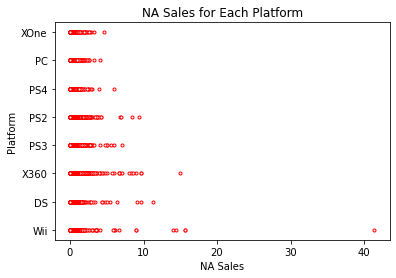

In [14]:
# Create a scatter plot of NA Sales for the Platforms and then save the figure
plt.scatter(updated_df2['NA_Sales'],updated_df2['Platform'],marker=".",facecolors="white",\
           edgecolors="red",alpha=1)
plt.title("NA Sales for Each Platform")
plt.xlabel("NA Sales")
plt.ylabel("Platform")
plt.savefig('Resources/Platforms_NA_Sales')
plt.show()

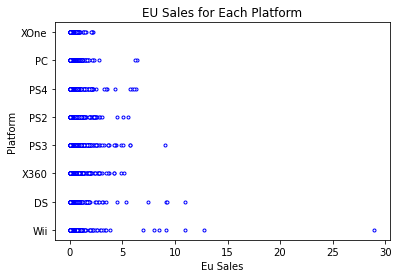

In [15]:
# Create a scatter plot of EU Sales for the Platforms and then save the figure
plt.scatter(updated_df2['EU_Sales'],updated_df2['Platform'],marker=".",facecolors="white",\
           edgecolors="blue",alpha=1)
plt.title("EU Sales for Each Platform")
plt.xlabel("Eu Sales")
plt.ylabel("Platform")
plt.savefig('Resources/Platforms_EU_Sales')
plt.show()

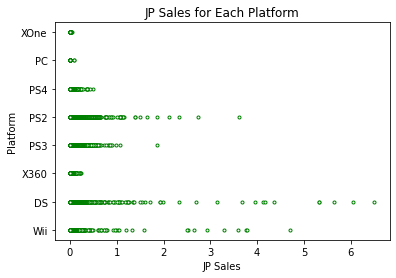

In [16]:
# Create a scatter plot of JP Sales for the Platforms and then save the figure
plt.scatter(updated_df2['JP_Sales'],updated_df2['Platform'],marker=".",facecolors="white",\
           edgecolors="green",alpha=1)
plt.title("JP Sales for Each Platform")
plt.xlabel("JP Sales")
plt.ylabel("Platform")
plt.savefig('Resources/Platforms_JP_Sales')
plt.show()

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.style as style
import seaborn as sns


In [18]:
video_game_sales_path = "Resources/Video_Games_Sales_as_at_22_Dec_2016.csv"
video_game_sales_df = pd.read_csv(video_game_sales_path)

In [19]:
#Drop all rows that contain a NaN value
video_game_sales_df.dropna()

#Show multiple specific columns 
video_game_sales_df[['Year_of_Release','Genre','Global_Sales','Rating']]

,Year_of_Release,Genre,Global_Sales,Rating
0,2006.0,Sports,82.53,E
1,1985.0,Platform,40.24,NaN
2,2008.0,Racing,35.52,E
3,2009.0,Sports,32.77,E
4,1996.0,Role-Playing,31.37,NaN
...,...,...,...,...
16714,2016.0,Action,0.01,NaN
16715,2006.0,Sports,0.01,NaN
16716,2016.0,Adventure,0.01,NaN
16717,2003.0,Platform,0.01,NaN


In [20]:
#Count the Genres that have occured within each year
year_counts = video_game_sales_df["Genre"].value_counts()
year_counts

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [21]:
data_path = "Resources/Video_Games_Sales_as_at_22_Dec_2016.csv"

In [22]:
# Read in the table with headers
df = pd.read_csv(data_path, header=0)
# First, get rid of games missing ratings
dfsub = df[df.Rating.notnull()]
dfsub.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [23]:
dfsub.groupby(df['Rating']).count()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
Rating,,,,,,,,,,,,,,,,
AO,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
E,3991,3991,3922,3991,3989,3991,3991,3991,3991,3991,2808,2808,3951,2375,3991,3991
E10+,1420,1420,1393,1420,1418,1420,1420,1420,1420,1420,1118,1118,1413,1043,1420,1420
EC,8,8,8,8,8,8,8,8,8,8,0,0,8,1,8,8
K-A,3,3,3,3,3,3,3,3,3,3,1,1,3,3,3,3
M,1563,1563,1536,1563,1562,1563,1563,1563,1563,1563,1483,1483,1560,1518,1563,1563
RP,3,3,1,3,3,3,3,3,3,3,3,3,2,2,3,3
T,2961,2961,2905,2961,2959,2961,2961,2961,2961,2961,2640,2640,2941,2561,2961,2961


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1981.0'),
  Text(2, 0, '1982.0'),
  Text(3, 0, '1983.0'),
  Text(4, 0, '1984.0'),
  Text(5, 0, '1985.0'),
  Text(6, 0, '1986.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31, 0, '2011.0'),
  Text(32, 0, '2012.0'),
  T

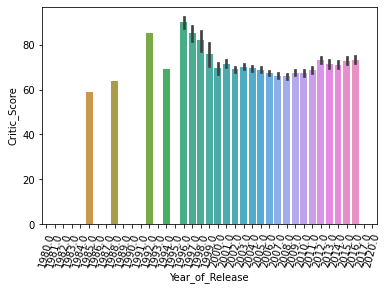

In [24]:
#How do components such as Critic Rating change over time?
dfsub = df[df.Year_of_Release.notnull()]
sns.barplot(x="Year_of_Release", y="Critic_Score", data=dfsub)
plt.xticks(rotation=75)

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.style as style

In [26]:
video_game_sales_path = "Resources/Video_Games_Sales_as_at_22_Dec_2016.csv"
video_game_sales_df = pd.read_csv(video_game_sales_path)

In [27]:
video_game_sales_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#Checking for null values in the dataset.
video_game_sales_df.count()
video_game_sales_df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [29]:
# Dropping Null Values 
no_null_video_game_sales_df = video_game_sales_df.dropna(how='any')
video_game_sales_df=no_null_video_game_sales_df 
no_null_video_game_sales_df.count()

Name               6825
Platform           6825
Year_of_Release    6825
Genre              6825
Publisher          6825
NA_Sales           6825
EU_Sales           6825
JP_Sales           6825
Other_Sales        6825
Global_Sales       6825
Critic_Score       6825
Critic_Count       6825
User_Score         6825
User_Count         6825
Developer          6825
Rating             6825
dtype: int64

In [30]:
# Verifying Dropped Null Values and Dtypes
no_null_video_game_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [31]:
# Changing dtype of User_Score
no_null_video_game_sales_df['User_Score'] = no_null_video_game_sales_df['User_Score'].astype(float)

In [32]:
#Verifying change and checking the sum
no_null_video_game_sales_df.info()
no_null_video_game_sales_df["User_Count"].sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   float64
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(10), object(6)
memory usage: 906.4+ KB


1192480.0

In [33]:
#Aggregrating the mean of the user_score based on the rating and genre
rating_by_genre= pd.DataFrame(no_null_video_game_sales_df.groupby(['Genre','Rating'])['User_Score'].agg('mean'))
rating_by_genre

User_Score
Genre        Rating            
Action       AO        8.600000
             E         6.742932
             E10+      6.831438
             M         7.312926
             T         7.137113
Adventure    E         6.546939
             E10+      6.375000
             M         7.518824
             T         7.463415
Fighting     E         6.350000
             E10+      6.607143
             M         7.297778
             T         7.351757
Misc         E         6.758896
             E10+      6.837500
             K-A       7.400000
             M         6.736364
             T         6.977519
Platform     E         7.552917
             E10+      6.892308
             M         7.533333
             T         7.516071
Puzzle       E         7.317978
             E10+      7.179167
             T         6.400000
Racing       E         7.161143
             E10+      7.025316
             M         5.288235
             T         7.231852
Role-Playing E         7.972603
             E10+      7.399000
             M         7.325658
             T         7.723514
Shooter      E         7.640909
             E10+      7.261765
             M         6.997706
             T         7.185614
Simulation   E         7.028155
             E10+      6.885714
             M         7.460000
             T         7.350311
Sports       E         7.173475
             E10+      6.616216
             M         7.036364
             T         7.016346
Strategy     E         7.352381
             E10+      6.782258
             M         7.029167
             RP        6.800000
             T         7.669565

In [34]:
#reseting the index and deleting bad data
no_index_rating_by_genre=rating_by_genre.reset_index()
cleaned_no_index_rating_by_genre=no_index_rating_by_genre.drop(no_index_rating_by_genre.index[[0,15,48]])

In [35]:
#looks like Puzzle Genre type is missing a value (have to set to 0)
cleaned_no_index_rating_by_genre['Rating'].value_counts()
cleaned_no_index_rating_by_genre

,Genre,Rating,User_Score
1,Action,E,6.742932
2,Action,E10+,6.831438
3,Action,M,7.312926
4,Action,T,7.137113
5,Adventure,E,6.546939
6,Adventure,E10+,6.375000
7,Adventure,M,7.518824
8,Adventure,T,7.463415
9,Fighting,E,6.350000
10,Fighting,E10+,6.607143


In [36]:
#Used this code to check for individiluzed rating and user_score
#E_Rating=cleaned_no_index_rating_by_genre.loc[cleaned_no_index_rating_by_genre['Rating']=="E"]
#E_Rating
#E_Rating['User_Score'].tolist()

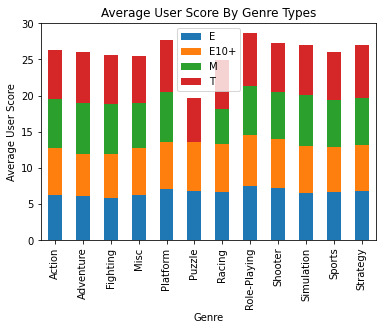

In [37]:
#Graph of the average user score by genre type
stacked_bar_chart_avg_user_genre = pd.DataFrame(index=['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle','Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports','Strategy'], 
                                                data = {'E': [6.277486910994765,6.122448979591836,5.833333333333333,6.306748466257669,7.104166666666667,6.876404494382022,6.731428571428571,7.534246575342466,7.2272727272727275,6.592233009708738,6.704244031830239,6.880952380952381], 
                        'E10+': [6.431438127090301,5.84375,6.142857142857143,6.3875,6.4423076923076925,6.75,6.620253164556962,6.96,6.794117647058823,6.5,6.162162162162162,6.241935483870968], 
                        'M': [6.861759425493716,7.0588235294117645,6.8,6.2727272727272725,7.0,0,4.823529411764706,6.842105263157895,6.537284894837476,7.0,6.545454545454546,6.583333333333333], 
                        'T': [6.694158075601375, 7.048780487804878,6.875399361022364,6.51937984496124,7.089285714285714,6.0,6.792592592592593,7.281653746770026,6.76140350877193,6.906832298136646,6.586538461538462,7.239130434782608]})

ax = stacked_bar_chart_avg_user_genre.plot(kind="bar", stacked=True)
plt.title("Average User Score By Genre Types")
plt.xlabel("Genre")
plt.ylabel("Average User Score")
plt.show()


In [38]:
#aggregation of games purchased
games_purchased= pd.DataFrame(no_null_video_game_sales_df.groupby(['Genre','Rating'])['User_Score'].agg('count'))
games_purchased

User_Score
Genre        Rating            
Action       AO               1
             E              191
             E10+           299
             M              557
             T              582
Adventure    E               49
             E10+            32
             M               85
             T               82
Fighting     E                6
             E10+            14
             M               45
             T              313
Misc         E              163
             E10+            80
             K-A              1
             M               11
             T              129
Platform     E              240
             E10+           104
             M                3
             T               56
Puzzle       E               89
             E10+            24
             T                5
Racing       E              350
             E10+            79
             M               17
             T              135
Role-Playing E               73
             E10+           100
             M              152
             T              387
Shooter      E               22
             E10+            34
             M              523
             T              285
Simulation   E              103
             E10+            28
             M                5
             T              161
Sports       E              754
             E10+            74
             M               11
             T              104
Strategy     E               42
             E10+            62
             M               24
             RP               1
             T              138

In [39]:
#reset index
no_index_games_purchased=games_purchased.reset_index()
#dropped bad data
cleaned_no_index_games_purchased=no_index_games_purchased.drop(no_index_games_purchased.index[[0,15,48]])
#checked data deletion
cleaned_no_index_games_purchased
#renamed column
number_of_purchased_games = cleaned_no_index_games_purchased.rename(columns={'User_Score': 'Number of Games'})
#quick check
number_of_purchased_games

,Genre,Rating,Number of Games
1,Action,E,191
2,Action,E10+,299
3,Action,M,557
4,Action,T,582
5,Adventure,E,49
6,Adventure,E10+,32
7,Adventure,M,85
8,Adventure,T,82
9,Fighting,E,6
10,Fighting,E10+,14


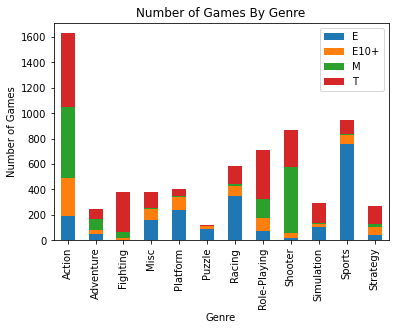

In [40]:
#Graph of the number of games purchased by genre type
stacked_bar_chart_games_purchased_by_genre = pd.DataFrame(index=['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle','Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports','Strategy'], 
                                                data = {'E': [191, 49, 6, 163, 240, 89, 350, 73, 22, 103, 754, 42], 
                        'E10+': [299, 32, 14, 80, 104, 24, 79, 100, 34, 28, 74, 62], 
                        'M': [557, 85, 45, 11, 3, 0, 17, 152, 523, 5, 11, 24], 
                        'T': [582, 82, 313, 129, 56, 5, 135, 387, 285, 161, 104, 138]})

stacked_bar_chart_games_purchased_by_genre=stacked_bar_chart_games_purchased_by_genre.plot(kind="bar", stacked=True)
plt.title("Number of Games By Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Games")
plt.show()

In [41]:
#count aggregation to genre by rating
count_genre_by_rating= pd.DataFrame(no_null_video_game_sales_df.groupby(['Genre','Rating'])['Genre'].agg('count'))
#rename column
count_genre_by_rating= count_genre_by_rating.rename(columns={'Genre': 'Genre_Count'})
#checking df
count_genre_by_rating

Genre_Count
Genre        Rating             
Action       AO                1
             E               191
             E10+            299
             M               557
             T               582
Adventure    E                49
             E10+             32
             M                85
             T                82
Fighting     E                 6
             E10+             14
             M                45
             T               313
Misc         E               163
             E10+             80
             K-A               1
             M                11
             T               129
Platform     E               240
             E10+            104
             M                 3
             T                56
Puzzle       E                89
             E10+             24
             T                 5
Racing       E               350
             E10+             79
             M                17
             T               135
Role-Playing E                73
             E10+            100
             M               152
             T               387
Shooter      E                22
             E10+             34
             M               523
             T               285
Simulation   E               103
             E10+             28
             M                 5
             T               161
Sports       E               754
             E10+             74
             M                11
             T               104
Strategy     E                42
             E10+             62
             M                24
             RP                1
             T               138

In [42]:
#seting df to new df
reset_genre_count=count_genre_by_rating 
#resetting the index
reset_genre_count=count_genre_by_rating.reset_index()
#checking 
reset_genre_count
#deleting bad data
reset_genre_count=reset_genre_count.drop(reset_genre_count.index[[0,15,48]])

In [43]:
#Creating the Table for Rating and Genre types
genre_counting_df=pd.DataFrame([('E',191, 49, 6, 163, 240, 89, 350, 73, 22, 103, 754, 42), ('E10+',299, 32, 14, 80, 104, 24, 79, 100, 34, 28, 74, 62), ('M',557, 85, 45, 11, 3,0,17, 152, 523, 5, 11, 24),('T',582, 82, 313, 129, 56, 5, 135, 387, 285, 161, 104, 138)],
                                columns=['Rating','Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Platform',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy'])

In [44]:
#checking df
genre_counting_df
#setting new index
genre_counting_df_indexed=genre_counting_df.set_index("Rating", inplace=True)
#checking if df was indexed
genre_counting_df

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Rating,,,,,,,,,,,,
E,191,49,6,163,240,89,350,73,22,103,754,42
E10+,299,32,14,80,104,24,79,100,34,28,74,62
M,557,85,45,11,3,0,17,152,523,5,11,24
T,582,82,313,129,56,5,135,387,285,161,104,138


In [45]:
#Creating a new "Total column"
genre_counting_df["Total Genre Count"] = pd.NaT
genre_counting_df
#summing across values
sumed_genre_counting=genre_counting_df["Total Genre Count"] = genre_counting_df.iloc[0:4,:12].sum(axis=1)
#checking df
genre_counting_df
#sorted by desc
sorted_genre_counting_df= genre_counting_df.sort_values(by='Total Genre Count',ascending=False)
#checking sorted 
sorted_genre_counting_df

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Total Genre Count
Rating,,,,,,,,,,,,,
T,582,82,313,129,56,5,135,387,285,161,104,138,2377
E,191,49,6,163,240,89,350,73,22,103,754,42,2082
M,557,85,45,11,3,0,17,152,523,5,11,24,1433
E10+,299,32,14,80,104,24,79,100,34,28,74,62,930


In [46]:
#Table for average user score

genre_user_score_df=pd.DataFrame([('E',6.742931937172772,
 6.546938775510204,
 6.3500000000000005,
 6.758895705521471,
 7.552916666666666,
 7.317977528089888,
 7.161142857142854,
 7.972602739726029,
 7.640909090909091,
 7.028155339805826,
 7.173474801061013,
 7.352380952380953), ('E10+',6.8314381270902915,
 6.375,
 6.607142857142857,
 6.837500000000003,
 6.892307692307693,
 7.179166666666667,
 7.0253164556962036,
 7.399,
 7.261764705882353,
 6.885714285714287,
 6.616216216216217,
 6.782258064516129), ('M',7.312926391382414,
 7.518823529411764,
 7.29777777777778,
 6.736363636363637,
 7.533333333333334,
 0,
 5.288235294117648,
 7.325657894736847,
 6.997705544933083,
 7.460000000000001,
 7.036363636363637,
 7.029166666666665),('T',7.137113402061859,
 7.463414634146337,
 7.35175718849841,
 6.977519379844959,
 7.51607142857143,
 6.3999999999999995,
 7.231851851851851,
 7.723514211886308,
 7.185614035087716,
 7.350310559006209,
 7.016346153846152,
 7.669565217391304)],
                                columns=['User Score','Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Platform',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy'])

In [47]:
#checking df
genre_user_score_df
#setting new index 
genre_user_score_df_indexed=genre_user_score_df.set_index("User Score", inplace=True)
#checking indexed d
genre_user_score_df

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
User Score,,,,,,,,,,,,
E,6.742932,6.546939,6.350000,6.758896,7.552917,7.317978,7.161143,7.972603,7.640909,7.028155,7.173475,7.352381
E10+,6.831438,6.375000,6.607143,6.837500,6.892308,7.179167,7.025316,7.399000,7.261765,6.885714,6.616216,6.782258
M,7.312926,7.518824,7.297778,6.736364,7.533333,0.000000,5.288235,7.325658,6.997706,7.460000,7.036364,7.029167
T,7.137113,7.463415,7.351757,6.977519,7.516071,6.400000,7.231852,7.723514,7.185614,7.350311,7.016346,7.669565


In [48]:
#creating new column & checking df
genre_user_score_df["Total_Average_User_Score"] = pd.NaT
genre_user_score_df
#summing across
genre_user_score_df["Total_Average_User_Score"]= genre_user_score_df.iloc[0:4,:12].sum(axis=1)
#dividing by 12
avg_user = genre_user_score_df["Total_Average_User_Score"]/12
genre_user_score_df["Total_Average_User_Score"] = avg_user


#checking df
genre_user_score_df
#sorting values by greatest
sorted_genre_user_score_df= genre_user_score_df.sort_values(by='Total_Average_User_Score',ascending=False)
#checking new sorted
sorted_genre_user_score_df

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Total_Average_User_Score
User Score,,,,,,,,,,,,,
T,7.137113,7.463415,7.351757,6.977519,7.516071,6.400000,7.231852,7.723514,7.185614,7.350311,7.016346,7.669565,7.251923
E,6.742932,6.546939,6.350000,6.758896,7.552917,7.317978,7.161143,7.972603,7.640909,7.028155,7.173475,7.352381,7.133194
E10+,6.831438,6.375000,6.607143,6.837500,6.892308,7.179167,7.025316,7.399000,7.261765,6.885714,6.616216,6.782258,6.891069
M,7.312926,7.518824,7.297778,6.736364,7.533333,0.000000,5.288235,7.325658,6.997706,7.460000,7.036364,7.029167,6.461363
